# PA 1.2: A Random Adventure

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px; height: auto; margin: 0" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px; height: auto; margin: 0" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.2. Due: before Friday, Sep 13, 2023.*

*Note: you do not need to turn this assignment in (you will start doing this in Week 1.3).*

## Overview

*This **Programming Assignment** is meant to introduce you to a few key concepts that we will use repeatedly in MUDE. If you are not familiar with them, please visit us in question hours to make sure you understand the concepts well and can apply them in the notebooks.*

One of the main topics of this programming assignment is `numpy`, an essential Python package for scientific computation that facilitates, among other things: vector, matrix and linear algebra operations...in a computationally efficient way! **Note:** this assignment assumes you have a working knowledge of Python **lists**. if you aren't sure what a list is, please take some time to review this concept, perhaps [here](https://teachbooks.github.io/learn-python/main/01/In_a_Nutshell/01.html).

Topics in this assignment include:
1. Basic matrix operations using numpy
2. Applying linear algebra to solve a line
3. Normal distributions
4. Modelling data with normal distributions
5. Using Markdown to write richly-formatted text

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>For those of you that have never used Python before, or are very new to programming, this assignment will probably be difficult for you. Our intention is to make it obvious what concepts you do not know yet, so that you can ask a teacher (or perhaps a fellow student) for help. Thus, our advice is this: <em>write down all of the concepts and terms that are unfamiliar to you in this assignment and bring them with you to the Tuesday question hour to ask a teacher!</em> This will make it easier for us to help you, and point you to resources where you will be able to catch up with the programming concepts more quickly.</p></div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 0:</b>   
Run the following cell to import the Python packages required for this assignment. Be sure to select the <code>mude-base</code> environment, which should already have these packages installed.
</p>
</div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#Array is a certain number of values in a row. Is a collection set of values. np.array can do linear algebra operations. 

## Task 1: Messing with numpy


Numpy gives us lots of options for creating arrays, so we'll start by exploring some our main ones. It's worth nothing that a numpy array is an umbrella term for a vector **and** matrix. The easiest way to build a numpy array is to provide a list which represents the data of the array.

In [4]:
# Creating an array using lists
A = np.array([[1, 1], 
              [2, 2], 
              [3, 3], 
              [4, 4]])
A.shape

(4, 2)

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   
Creating a 2x2 matrix called `scale` which scales the x and y axes by 2.
</p>
</div>

In [5]:
scale = np.array([[2,0],
                  [0,2]])


We'll try to scale the data in `A` by `scale` using the cell below, but there seems to be an issue (running the cell should give an error).

In [6]:
A = A.T
scale @ A 


array([[2, 4, 6, 8],
       [2, 4, 6, 8]])

The error message indicates that we have a mismatch in the dimensions of the arrays. `A` has a dimension of (4, 2) and `scale` has a dimension of (2, 2). Do those dimensions make sense to you? Try using the `shape` method of the arrays to print out this information for yourself, then complete Task 1.2 to try and complete the matrix computation.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b>   
    Let's treat <code>A</code> as a data array, where each column will be the x-y coordinates of a point. Transform the current <code>A</code> into this form. What you'll need to do is transpose it. Find out how to do so in as short a code as possible! Hint: look through the methods in the <a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.transpose.html" target="_blank">numpy documentation</a>
</p>
</div>

In [8]:
A.T

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4]])

Once you've done **Task 1.2**, re-run the cell that failed earlier. You should see each point has had both the x and y components multiplied by 2.

We can also visualize our data as shown below. Numpy as allows you to index arrays in very complicated ways. For example `A[0, :]` returns an array with all the data from the first row. You can do much more as we'll see later. The documentation for this is found [here](https://numpy.org/doc/stable/user/basics.indexing.html).

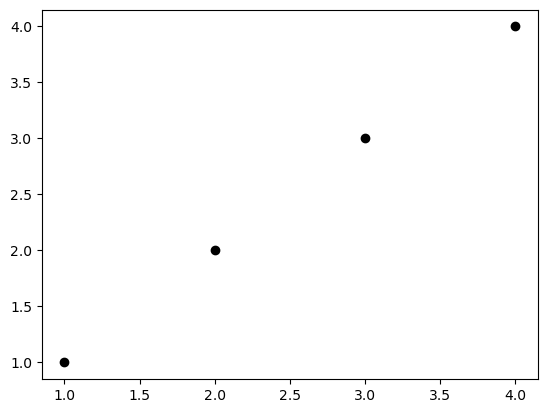

In [52]:
plt.plot(A[0, :], A[1, :], 'ko') # Same as plt.plot(*A)
plt.show()

Let's look at some more ways to make arrays. The most basic ones, but very useful as `np.ones` and `np.zeros`, `np.linspace`.

In [12]:
empty = np.zeros(shape=(2, 2))
shear = np.ones(shape=(2, 2))

line_A_x = np.linspace(0, 12, num=10)
line_A = np.array([line_A_x, 5*line_A_x + 2])

print(empty)
print()
print(shear)
print()
print(line_A)


[[0. 0.]
 [0. 0.]]

[[1. 1.]
 [1. 1.]]

[[ 0.          1.33333333  2.66666667  4.          5.33333333  6.66666667
   8.          9.33333333 10.66666667 12.        ]
 [ 2.          8.66666667 15.33333333 22.         28.66666667 35.33333333
  42.         48.66666667 55.33333333 62.        ]]


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.3:</b>   
Mess around with the shape keyword argument in the code above to get a feel for what it does. How big can the tuple be? Then, try to generate more data points in <code>line_A</code>, but keeping the same range. Finally, see if you can manipulate the range of <code>line_A</code> and get the last value in the printed array to be 62.
</p>
</div>

The `np.eye` function can be used to make a matrix with ones on a diagonal (by default the main diagonal)

In [13]:
# Generate scale through a different method
identity = np.eye(N = A.shape[0])

# Check it's really identity
truth_array = identity @ A == A # This is actually an array with some boolean values
assert (identity @ A == A).all()

# Making scale again:
scale_2 = 2 * identity
assert (scale_2 == scale).all()
print(line_A)

[[ 0.          1.33333333  2.66666667  4.          5.33333333  6.66666667
   8.          9.33333333 10.66666667 12.        ]
 [ 2.          8.66666667 15.33333333 22.         28.66666667 35.33333333
  42.         48.66666667 55.33333333 62.        ]]


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.4:</b>   
Can you understand what the code cell above is doing? You should be able to read and comprehend, but at the moment are not expected to create this exact code yet yourself in MUDE.
</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.5:</b>   
As a final numpy recap exercise, define a matrix which reflects along the x=y axis and apply it to <code>line_A</code>. Plot it to check that it worked. Hint: first think of the reflection matrix, then find a way to implement it in code.
</p>
</div>

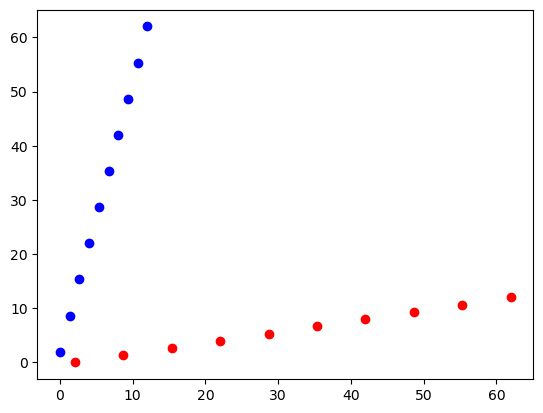

In [73]:
reflect = np.array([[0, 1],
                    [1, 0]]) 
result = reflect @ line_A

plt.plot(*result, "or")
plt.plot(*line_A, "ob")
plt.show()

## Task 2: Applying multiplication to solve lines

Below you've been handed some code that generates the data for a line (with some random error), and a function which calculates the fit of the line using the `lstsq` function you encountered last week. Your task will be to write another function `fit_a_line_to_data_2` that has the same inputs as `fit_a_line_to_data`, but uses `np.linalg.solve` instead of `np.linalg.lstsq`. You'll find the following equation useful:
$$
A^\intercal A x = A^\intercal b
$$

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.1:</b>   
Research the difference between <code>np.linalg.lstsq</code> and <code>np.linalg.solve</code>. Consider when you can interchange them what their main differences are, then complete the function below using <code>np.linalg.solve</code>. The plot commands will help you confirm that your answer is correct: you'll see a red line show up on top of the black line.  
</p>
</div>

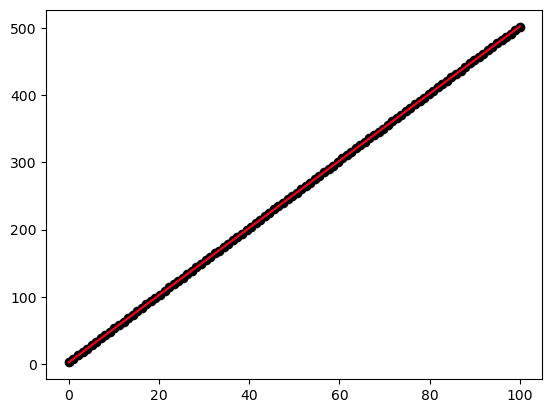

In [77]:
data_x = np.linspace(0, 100, num=100)
data_y = data_x * 5 + 2 + np.random.random(size = (100,))

def fit_a_line_to_data(data_x, data_y):
    A = np.array([data_x, np.ones(len(data_x))]).T
    [slope, intercept], _, _, _ = np.linalg.lstsq(A, data_y, rcond=None)
    return slope, intercept

def fit_a_line_to_data_2(data_x, data_y):
    ## Complete the function here ##
    A = np.array([data_x, np.ones(len(data_x))]).T
    [slope, intercept] = np.linalg.solve(A.T @ A, A.T @ data_y) #DO NOT UNDERSTAND WHY I NEED TO DO THE A.T@DATA_Y + WHAT IS THE DIFFERENCE
    return slope, intercept

plt.plot(data_x, data_y, "ok")

slope1, intercept1 = fit_a_line_to_data(data_x, data_y)
slope2, intercept2 = fit_a_line_to_data_2(data_x, data_y)

plt.plot(data_x, slope1*data_x + intercept1, "b")
plt.plot(data_x, slope2*data_x + intercept2, "r")
plt.show()

## Task 3: normal distribution basics

As we discussed in lecture, it is important to have a variety of methods for quantifying uncertainty; one important type of uncertainty is aleatory: due to randomness. Numpy provides a simple way to generate random arrays (from a variety of distributions). For example, `np.random.random` us useful for making random data between 0 and 1 (a continuous Uniform distribution). Note how the code below creates a matrix filled with values, and they are evenly spread over the plot. This represents two random variables each with the standard uniform distribution.

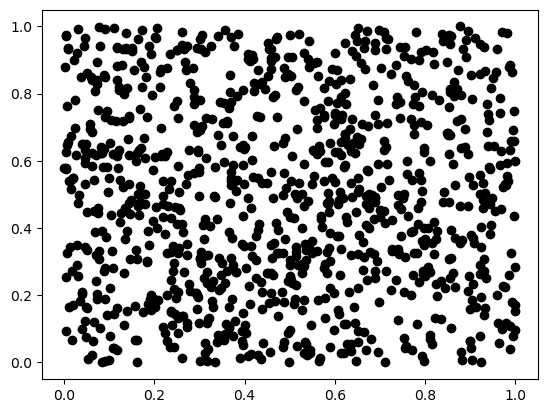

In [78]:
N = 1000
A = np.random.random(size = (2, N))
plt.plot(*A, "ok")
plt.show()

We will focus initially in MUDE on the Normal (or Gaussian) distribution, which is also easy to use with numpy, for example: `np.random.normal(loc=?, scale=?, size=(?, ?))`. In this case the `loc` abd `scale` arguments are the location and scale parameters, which are equivalent to the mean and standard deviation for this distribution (we will learn more about this in week 7).

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b>   
    Using the examples above as a guide, create and plot a random sample of two normal distributions each with mean 10 and standard deviation 5.
</p>
</div>

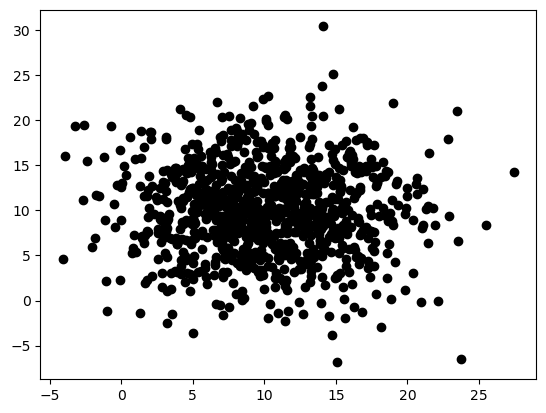

In [80]:
A = np.random.normal(loc =10, scale=5, size = (2, N))
plt.plot(*A, "ok")
plt.show()

The `norm` class in `scipy.stats` can also be used to model a normal distribution. It is more useful than the numpy methods because you can easily create an instance which has custom `loc` and `scale` parameters, and then call important methods like `X.cdf` and `X.pdf`. 

In [85]:
X = norm(loc = 0, scale = 1)
print(X.stats())

(0.0, 1.0)


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.2:</b>   
    Use the <code>cdf</code> method to find P[X < 0].
</p>
</div>

In [86]:
p_x_lt_0 = X.cdf(0)

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.3:</b>   
Find P[X > 1].
</p>
</div>

In [90]:
p_x_gt_1 = 1-X.cdf(1)
print(p_x_gt_1)

0.15865525393145707


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.4:</b>   
Finally, use <code>linspace</code> and the <code>pdf</code> method to plot the distribution <code>X</code>.
</p>
</div>

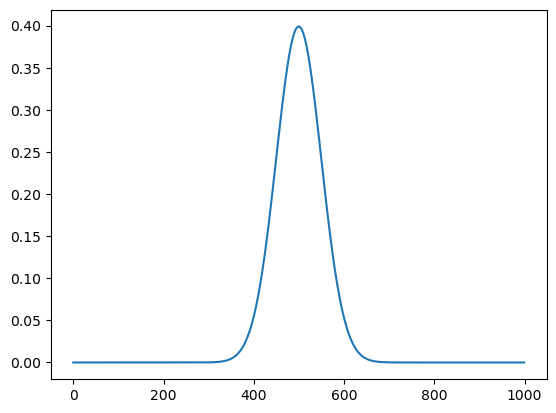

In [15]:
x = norm.pdf(np.linspace(-10, 10, num=1000))
plt.plot(x) 
plt.show()

## Task 4: Application 1---Modelling with normal distributions

In this Task we will combine several MUDE topics: modelling concepts, uncertainty, numpy arrays, a function of random variables and propagation of uncertainty. It may seem like a lot, but in the end you are only asked to make a few small changes to the code.

In this Task one of the strategies to keep our code organized is to use **functions.** It is very useful to write simple functions to that can be used repeatedly in our analysis. In addition, it is important to recognize that rather than importing data we are *simulating* our own data using random samples from the normal distributions for length and width. Why? One reason is perhaps we already know what the distribution of values is, and we don't have enough measurements.

Assume that the length and width each have a Normal distribution as follows:
$$
height \sim \mathcal{N}(5000, 25) \\
width \sim \mathcal{N}(2000, 100)
$$

The exact steps for the Task are:
1. Create a random sample for two random variables: length and width of an object
2. Compute the output of the function of random variables: area
3. Plot the histogram of area
4. Compute the mean and standard deviation of area
5. Compute the PDF of area and add it to the histogram

To facilitate this, we will start by writing **four functions** to automate the process. You will see the advantage of writing functions in the beginning of your code, because it makes the code much easier to write, run and interpret later! You may also want to refer to Chapters 1 and 3 of the [online Python course](https://teachbooks.github.io/learn-python/main/intro.html) to refresh your memory of functions.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.1:</b>   
    Complete the functions outlined in the code cells below. The function name and docstring should indicate what is required for each. You can also look at the code for Task 4.2 to see exactly how each function should be used.
</p>
</div>

In [16]:
def create_sample(N):
    "Create N samples each of height and width."
    height = np.array(norm.rvs(loc = 5000 , scale = np.sqrt(25), size = N ))
    width = np.array(norm.rvs(loc = 2000, scale = np.sqrt(100), size = N ))
    return height, width

def compute_area(height, width):
    "Compute the area of the rectangle."
    area = height*width
    return area

def area_mean_std(area_data):
    "Find the mean and std dev of the area."
    area_mean = np.mean(area)
    area_std = np.std(area)
    return area_mean, area_std

def plot_data_and_pdf(data, mean, std):
    "Compare the histogram of data to a normal pdf defined by mean and std."
    histogram_data = plt.hist(data, bins = 10,
                              density=True, stacked=True,  edgecolor='black', linewidth=1.2)
    x = np.linspace(min(histogram_data[1]), max(histogram_data[1]), num=1000)
    area_norm = norm(loc=mean, scale=std)
    plt.plot(x, area_norm.pdf(x), color='red', linewidth=2.0)
    plt.title("")
    plt.xlabel("")
    plt.ylabel("")
    plt.show()

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.2:</b>   
    Run the cell below to see if your functions worked. The correct output will be a plot with histogram in blue and the PDF as a red line.
</p>
</div>

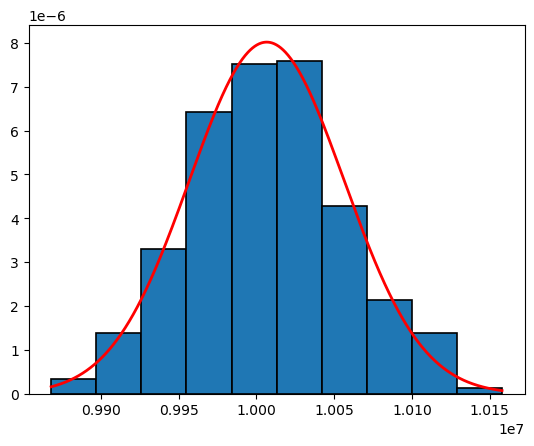

In [17]:
N = 500
height, width = create_sample(N)
area = compute_area(height, width)
area_mean, area_std = area_mean_std(area)
plot_data_and_pdf(area, area_mean, area_std)

## Task 5: Reporting your Results with Markdown

Now we would like to quickly communicate our results; imagine you will be sending this notebook to a classmate or a teacher and you really want them to be able to see the final answer easily, while also being able to understand how you arrived at it. We can do this quick easily using Markdown cells in the notebook (of course if you haven't realized it yet, this cell you are reading is a Markdown cell).

Markdown is a _markup language_ that makes it possible to write richly-formatted text in Jupyter notebooks (see the course website for more information and examples). We will use Markdown on a weekly basis in our MUDE project reports, so this is a good chance to use it for the first time, if you never have. Use the cell below to write your answer to Q1, using the following formatting tips:
- Write out lists by beginning the line with a hyphen `- my item`, or a number and dot `1. first item`
- You make text **bold** by using `**double asterisk**` and *italics* with `*one asterisk*`.
- `Highlight` code-related words or other important concepts using back-ticks `` `like this` ``
```python
message="You can also make multi-line code blocks with three back-ticks
extra_message="Provide a language after the first backticks to get syntax highlighting
# e.g. 
#```python
# this explanation
# ```
print(message)
print(extra_message)
```

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>   
Use the Markdown cell below to document your answer from the previous tasks; try to use as many Markdown elements as possible. For example, describe the mean, explain what the figure shows, list a few observations, describe the code you wrote, etc..
<br><br>Note that there is no "wrong" answer here: as long as you feel comfortable with Markdown you can move on, comfortable you will be ready for the Group Assignment this Friday.
</p>
</div>

Write your Markdown **here!**
1. MARKDOWN: 
2. 

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.